## Overview of the whole pipeline

Data Preprocessing:
- Acquisition
- Exploration and Cleaning
- Visualisation and Summary Statistics
- Feature Engineering
- Pre-processing for the specific computationals tools we have decided on

Other shit:

- Modelling and Evaluation
- Reporting, telling a story, connecting the dots


## Data Preprocessing

Acquire the Data
- Data folder. 
- Now we load files and folders.

In [11]:
import os
import pandas as pd
import numpy as np

data_dir = "Data/ml-latest-small"
movies_path = os.path.join(data_dir, "cleaned_movies.csv")
ratings_path = os.path.join(data_dir, "ratings.csv")
tags_path = os.path.join(data_dir, "cleaned_tags.csv")
links_path = os.path.join(data_dir, "cleaned_links.csv")

- Load the datasets into pandas DataFrames:

In [12]:
# Load the datasets into pandas DataFrames:
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path, usecols=['userId', 'movieId', 'rating']) # Discard timestamp column
tags = pd.read_csv(tags_path)
links = pd.read_csv(links_path)


In [14]:
## At a high level

# Movies 
# Print total number of movies
print("Total number of movies: ", len(movies))

# Print total number of ratings and users
#load ratings column 1 as numpy array
ratings_array = ratings.iloc[:, 1].values
#extract last userId to get total number of users
total_users = ratings['userId'].max()
print(total_users ," users gave ", str(len(ratings)) , " ratings.")

Total number of movies:  9742
610  users gave  100836  ratings.


- Visualise Movies CSV

In [15]:
print("Movies DataFrame:")
movies.head()


Movies DataFrame:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


- Visualise Links CSV

In [17]:
print("Links DataFrame:")
links.head()


Links DataFrame:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


- Visualise Ratings CSV

In [18]:
print("Ratings DataFrame:")
ratings.head()


Ratings DataFrame:


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


- Visualise Tags CSV

In [19]:
print("Tags DataFrame:")
tags.head()

Tags DataFrame:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


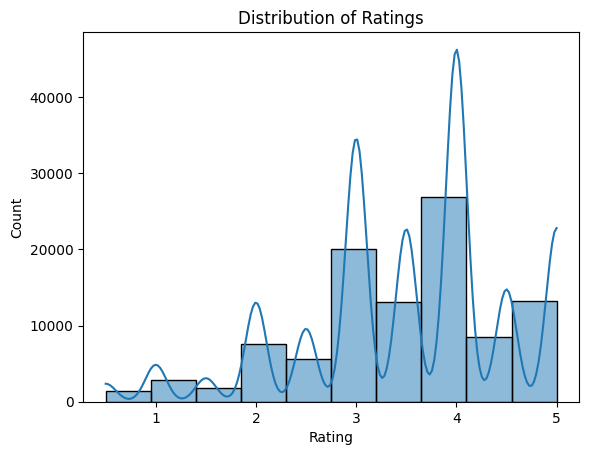

In [20]:
# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

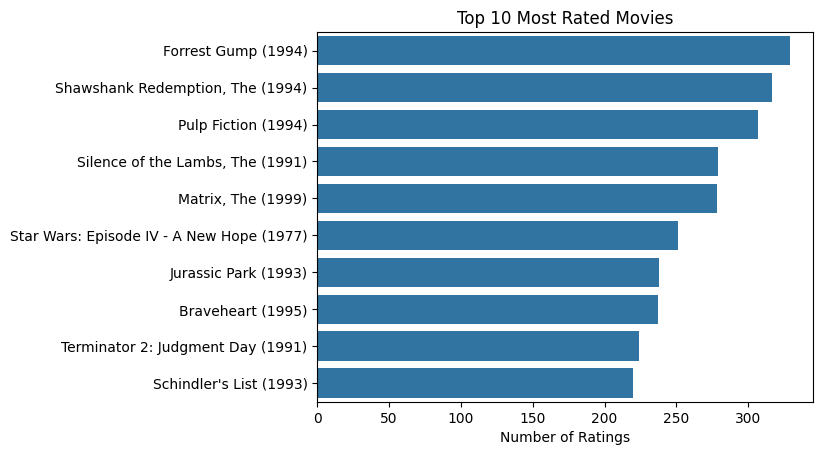

In [21]:
movie_ratings = ratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

movie_ratings = movie_ratings.merge(movies, on='movieId')

top_movies = movie_ratings.sort_values('num_ratings', ascending=False).head(10)

sns.barplot(y='title', x='num_ratings', data=top_movies)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("")
plt.show()

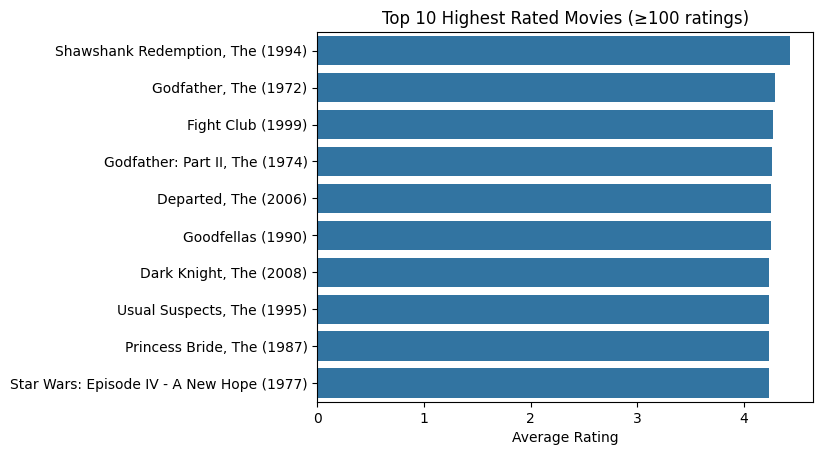

In [22]:
popular = movie_ratings[movie_ratings['num_ratings'] > 100]
top_rated = popular.sort_values('avg_rating', ascending=False).head(10)

sns.barplot(y='title', x='avg_rating', data=top_rated)
plt.title("Top 10 Highest Rated Movies (≥100 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("")
plt.show()


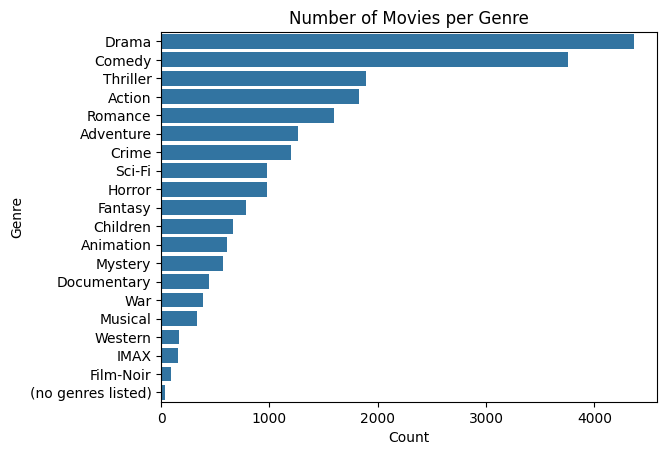

In [23]:
from collections import Counter

genre_counts = Counter(g for genres in movies['genres'] for g in genres.split('|'))
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

sns.barplot(y='Genre', x='Count', data=genre_df.sort_values('Count', ascending=False))
plt.title("Number of Movies per Genre")
plt.show()


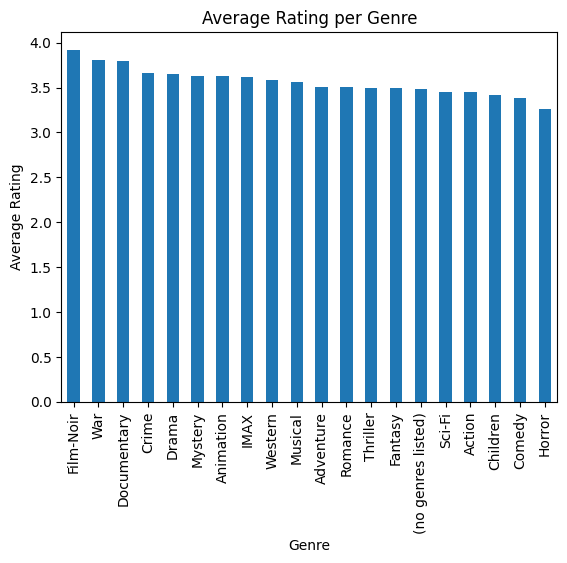

In [24]:
# Average rating per genre

movie_genres = movies.assign(Genre=movies['genres'].str.split('|')).explode('Genre')
genre_ratings = ratings.merge(movie_genres, on='movieId')
avg_genre_rating = genre_ratings.groupby('Genre')['rating'].mean().sort_values(ascending=False)

avg_genre_rating.plot(kind='bar')
plt.title("Average Rating per Genre")
plt.ylabel("Average Rating")
plt.show()

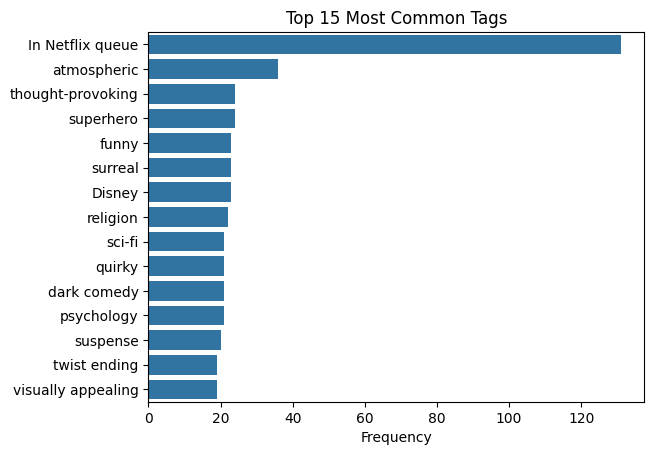

In [26]:
tag_counts = tags['tag'].value_counts().head(15)
sns.barplot(y=tag_counts.index, x=tag_counts.values)
plt.title("Top 15 Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("")
plt.show()